We want to evaluate a simple, nested sum by importance sampling.
$$S = \sum_{m=0}^{M-1} \sum_{n=m}^{M-1} mn$$

The importance sampling method is as follows. Let $f(m,n) = mn$, s.t. $S = \sum_{m=0}^{M-1} \sum_{n=m}^{M-1} f(m, n)$. Let $p(m, n)$ be a pdf that is non-zero for all values of $m$ and $n$. We can rewrite our sum as
$$S = \sum_{m=0}^{M-1} \sum_{n=m}^{M-1} f(m, n) \frac{p(m, n)}{p(m, n)} = \mathbb{E}_{p(m,n)}\bigg[\frac{f(m, n)}{p(m, n)}\bigg].$$
In this case, we will sample $m$ uniformly from $[0, M)$, then sample $n$ uniformly from $[m, M)$. The probability to draw $m$ is $p(m) = 1/M$, and the probability to draw $n$ given $m$ is $p(n|m) = 1/((M-1)-m+1)$. The probability of both indices is $p(m, n) = p(m) p(n|m)$.

In [43]:
import numpy as np
from math import log10
import matplotlib.pyplot as plt

In [44]:
def evaluate_exactly(M: int) -> int:
    total = 0
    for m in range(M):
        for n in range(m, M):
            total += m * n
    return total

In [45]:
def evalute_by_sampling(M: int, samples: int):
    sample_nums = []
    sample_checkpoints = []
    total = 0.
    for i in range(samples):
        # Sample the indices (m, n). Each is chosen uniformly from its valid range.
        m = np.random.randint(0, M)
        n = np.random.randint(m, M)
        p_m = 1. / len(range(0, M)) # Probablity that we get a value of m.
        p_n = 1. / len(range(m, M)) # Probablity of n given the value of n.
        p = p_m * p_n # Probablity of the pair (m, n).
        # print(f"m={m} n={n}")
        # print(f"p_m={p_m} p_n={p_n}")
        total += m * n / p
        if i == 0 or i % 10 == 0 or i == samples - 1:
            sample_nums.append(i)
            sample_checkpoints.append(total / (i + 1))
    return (sample_nums, sample_checkpoints)

In [51]:
total_p = 0.
M = 8
for m in range(0, M):
    for n in range(m, M):
        p_m = 1. / len(range(0, M)) # Probablity that we get a value of m.
        p_n = 1. / len(range(m, M)) # Probablity of n given the value of n.
        p = p_m * p_n # Probablity of the pair (m, n).
        total_p += p
print(total_p)

0.9999999999999999


In [52]:
M = 7
shots = 1_000_000
exact_summation = evaluate_exactly(M)
num_samples, sample_averages = evalute_by_sampling(M, shots)

In [53]:
errors = np.abs(np.array(sample_averages) - exact_summation) / abs(exact_summation)

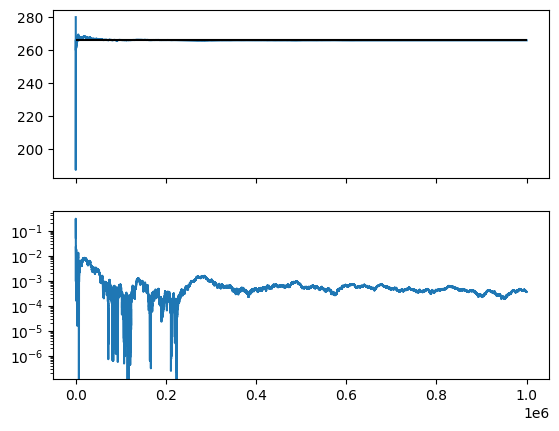

In [54]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(num_samples, sample_averages)
ax[0].hlines(exact_summation, 0, max(num_samples), colors="k")
ax[1].plot(num_samples, errors)
ax[1].set_yscale("log")

*Question*: Why is this not converging?